In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import subprocess
from itertools import product

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (4, 3.5),
    "text.latex.preamble": "\n".join([
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage[detect-all,locale=FR]{siunitx}",
    ]),
    'lines.markersize': 10,
    'lines.color': 'grey',
    'scatter.marker': '+',
    'errorbar.capsize': 3,
    'savefig.bbox': 'tight',
})

In [15]:
path = '../'
executable = 'bin/ex1'
export_path = path + 'rapport/figures/'
# config_file = 'bin/configuration.in.example'

In [16]:
def stringify_dict(d: dict, sep=',') -> str:
    return sep.join(map(lambda a: str(a[0]) + "=" + str(a[1]), tuple(d.items())))

In [17]:
def run(config_file: str, output_file: str, params: dict = {}) -> None:
    options = stringify_dict(params, sep=' ')
    cmd = f"{path}{executable} {path}{config_file} output='{path}{output_file}' {options}"
    print(f"Running command `{cmd}`")
    subprocess.run(cmd, shell=True, stdout=subprocess.DEVNULL)

In [18]:
nsteps = np.array([5, 10, 50, 80, *range(100, 2000, 100)]) # TODO change
nsimul = len(nsteps)  # Number of simulations to perform

m = 0.056
v0 = 0
omega = 62.831853072
mu = 6
rho = 1.2
R = 0.033

alpha = mu * omega * R**3 * rho / m
tfin = 2 * np.pi / alpha
print(f"{tfin=}")
dt = tfin / nsteps

tfin=21.642813194625333


In [19]:
%%bash
cd .. && make clean && make

rm: cannot remove 'data/*.log': No such file or directory


clang++ -o bin/ex1 src/Exercice1_student.cpp -std=c++17 -Wall -Wextra -O2 


In [20]:
params_variations = {
    'nsteps': nsteps,
    'alpha': [0, 0.5, 1],
    # to comment out:
    # 'tfin': [300],
}
config_name = "rotate_grav"
all_params = tuple(
    {a: b for a, b in zip(params_variations.keys(), c)} for c in product(*params_variations.values())
)

# Run simulations
outputs = []  # List to store output file names
for params in all_params:
    output_file = f"data/{config_name},{stringify_dict(params)}.out"
    outputs.append(output_file)
    run(f'bin/{config_name}.conf', output_file, params)

Running command `../bin/ex1 ../bin/rotate_grav.conf output='../data/rotate_grav,nsteps=5,alpha=0.out' nsteps=5 alpha=0`
Running command `../bin/ex1 ../bin/rotate_grav.conf output='../data/rotate_grav,nsteps=5,alpha=0.5.out' nsteps=5 alpha=0.5`
Running command `../bin/ex1 ../bin/rotate_grav.conf output='../data/rotate_grav,nsteps=5,alpha=1.out' nsteps=5 alpha=1`
Running command `../bin/ex1 ../bin/rotate_grav.conf output='../data/rotate_grav,nsteps=10,alpha=0.out' nsteps=10 alpha=0`
Running command `../bin/ex1 ../bin/rotate_grav.conf output='../data/rotate_grav,nsteps=10,alpha=0.5.out' nsteps=10 alpha=0.5`
Running command `../bin/ex1 ../bin/rotate_grav.conf output='../data/rotate_grav,nsteps=10,alpha=1.out' nsteps=10 alpha=1`
Running command `../bin/ex1 ../bin/rotate_grav.conf output='../data/rotate_grav,nsteps=50,alpha=0.out' nsteps=50 alpha=0`
Running command `../bin/ex1 ../bin/rotate_grav.conf output='../data/rotate_grav,nsteps=50,alpha=0.5.out' nsteps=50 alpha=0.5`
Running command `.

In [21]:
# Filter stuff
explicit = []
implicit = []
semi_implicit = []

for file, params in zip(outputs, all_params):
    match params:
        case {'alpha': 1}: explicit.append((file, params))
        case {'alpha': 0.5}: semi_implicit.append((file, params))
        case {'alpha': 0}: implicit.append((file, params))
        case _: print("Feur alert")

print(semi_implicit)

[('data/rotate_grav,nsteps=5,alpha=0.5.out', {'nsteps': 5, 'alpha': 0.5}), ('data/rotate_grav,nsteps=10,alpha=0.5.out', {'nsteps': 10, 'alpha': 0.5}), ('data/rotate_grav,nsteps=50,alpha=0.5.out', {'nsteps': 50, 'alpha': 0.5}), ('data/rotate_grav,nsteps=80,alpha=0.5.out', {'nsteps': 80, 'alpha': 0.5}), ('data/rotate_grav,nsteps=100,alpha=0.5.out', {'nsteps': 100, 'alpha': 0.5}), ('data/rotate_grav,nsteps=200,alpha=0.5.out', {'nsteps': 200, 'alpha': 0.5}), ('data/rotate_grav,nsteps=300,alpha=0.5.out', {'nsteps': 300, 'alpha': 0.5}), ('data/rotate_grav,nsteps=400,alpha=0.5.out', {'nsteps': 400, 'alpha': 0.5}), ('data/rotate_grav,nsteps=500,alpha=0.5.out', {'nsteps': 500, 'alpha': 0.5}), ('data/rotate_grav,nsteps=600,alpha=0.5.out', {'nsteps': 600, 'alpha': 0.5}), ('data/rotate_grav,nsteps=700,alpha=0.5.out', {'nsteps': 700, 'alpha': 0.5}), ('data/rotate_grav,nsteps=800,alpha=0.5.out', {'nsteps': 800, 'alpha': 0.5}), ('data/rotate_grav,nsteps=900,alpha=0.5.out', {'nsteps': 900, 'alpha': 0.

# Plots!

## Trajectoiries

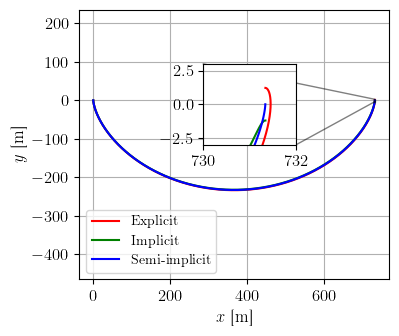

In [22]:
data_semi = np.loadtxt(path + semi_implicit[-1][0])
data_expl = np.loadtxt(path + explicit[-1][0])
data_impl = np.loadtxt(path + implicit[-1][0])

x_expl, y_expl = data_expl[:, 1], data_expl[:, 2]
x_impl, y_impl = data_impl[:, 1], data_impl[:, 2]
x_semi, y_semi = data_semi[:, 1], data_semi[:, 2]
plt.plot(x_expl, y_expl, c='r', label='Explicit')
plt.plot(x_impl, y_impl, c='g', label='Implicit')
plt.plot(x_semi, y_semi, c='b', label='Semi-implicit')



# inset axes....
x1, x2, y1, y2 = 730, 732, -3, 3
axins = plt.gca().inset_axes(
    [0.4, 0.5, 0.3, 0.3],
    xlim=(x1, x2), ylim=(y1, y2)
)
axins.plot(x_expl, y_expl, c='r', label='Explicit')
axins.plot(x_impl, y_impl, c='g', label='Implicit')
axins.plot(x_semi, y_semi, c='b', label='Semi-implicit')
axins.grid()

plt.gca().indicate_inset_zoom(axins, edgecolor="black")


plt.axis('equal')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$y$ [m]')
plt.grid()
plt.legend()


plt.savefig(export_path + "rotate_grav_trajectories.pdf")

## NRJ

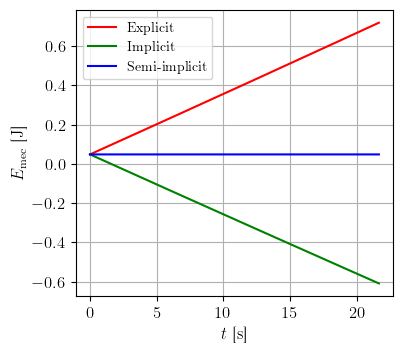

In [23]:
data_semi = np.loadtxt(path + semi_implicit[-1][0])
data_expl = np.loadtxt(path + explicit[-1][0])
data_impl = np.loadtxt(path + implicit[-1][0])

t_expl, e_expl = data_expl[:, 0], data_expl[:, 5]
t_impl, e_impl = data_impl[:, 0], data_impl[:, 5]
t_semi, e_semi = data_semi[:, 0], data_semi[:, 5]
plt.plot(t_expl, e_expl, c='r', label='Explicit')
plt.plot(t_impl, e_impl, c='g', label='Implicit')
plt.plot(t_semi, e_semi, c='b', label='Semi-implicit')

# plt.axis('equal')
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$E_\mathrm{mec}$ [J]')
plt.grid()
plt.legend()
# plt.figure(figsize=(5,4))
plt.tight_layout(pad=0.5)

plt.savefig(export_path + "rotate_grav_energy.pdf")

## Con verge

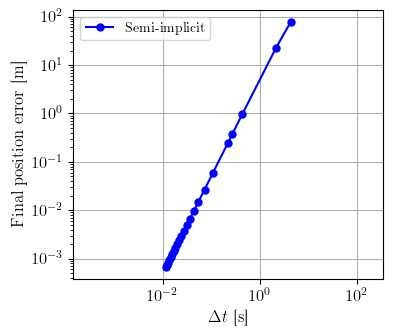

In [24]:
last_semi_x = []
last_semi_y = []
for file in semi_implicit:
    last_step = np.loadtxt(path + file[0])[-1]
    last_semi_x.append(last_step[1])
    last_semi_y.append(last_step[2])

last_semi_x = np.array(last_semi_x)
last_semi_y = np.array(last_semi_y)

g = 9.81
x_th = 2*np.pi*g/(alpha**2)
y_th = 0.0

# print(x_th)


error_semi = np.abs(np.sqrt((x_th - last_semi_x)**2 + (y_th - last_semi_y)**2))
plt.loglog(dt, error_semi, 'b.-', label='Semi-implicit')


plt.legend()

plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'Final position error [m]')
plt.xticks()
plt.yticks()
plt.grid()
plt.legend()
plt.axis('equal')

plt.savefig(export_path + "rotate_grav_errors.pdf")

## Plots volés chez cryptom

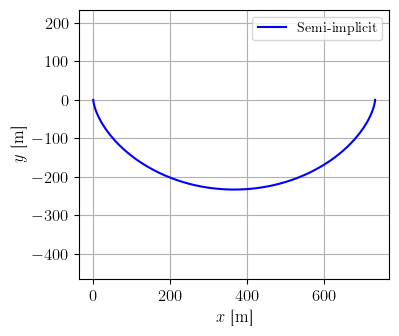

In [25]:
data = np.loadtxt(path + semi_implicit[-1][0])
xx3, yy3 = data[:, 1], data[:, 2]
plt.plot(xx3, yy3, c='b', label='Semi-implicit')

plt.axis('equal')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$y$ [m]')
plt.grid()
plt.legend()
plt.show()

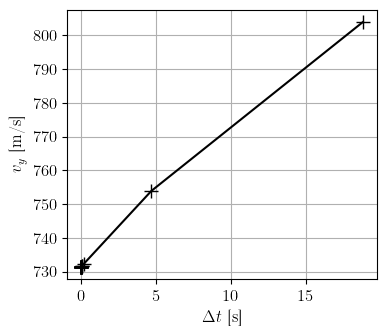

In [26]:
"""
Si on n'a pas la solution analytique: on représente la quantite voulue
(ci-dessous v_y, TODO: modifier selon vos besoins)
en fonction de (Delta t)^norder, ou norder est un entier.
"""
def calc(dataset):
    stuffies = []
    for i, (file, params) in enumerate(dataset):
        data = np.loadtxt(path + file)
        t, xx, yy, vx, vy, En = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5]
        stuffies.append(xx[-1])
    return stuffies

norder = 2  # TODO: Modify if needed

stuff = calc(semi_implicit)
plt.figure()
plt.plot(dt**norder, stuff, 'k+-')
plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'$v_y$ [m/s]')
plt.xticks()
plt.yticks()
plt.grid()